# Collaboration and Competition

this notebook shows how to train two agents to play Tennis in unity env.

---

In [1]:
# Importing libs

from unityagents import UnityEnvironment
import numpy as np

import torch
import torch.nn.functional as F
import torch.optim as optim

from ddpg_agent import Agent

from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Defining the unity env.
env = UnityEnvironment(file_name="Tennis_Linux_NoVis/Tennis.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


In [6]:
# Initializing agents
num_agents = len(env_info.agents)
agent = Agent(state_size=state_size, action_size=action_size, num_agents=num_agents, random_seed=0)

In [11]:
# Main function responsible for train agents over Actor-Critic method
def ddpg(n_episodes=3000):

    total_scores_deque = deque(maxlen=100)
    total_scores = []

    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations
        scores = np.zeros(num_agents)
        agent.reset()
        
 
        
        while True:
            actions = agent.act(states)
            env_info = env.step(actions)[brain_name]
            next_states = env_info.vector_observations   # get the next state
            rewards = env_info.rewards                   # get the reward
            dones = env_info.local_done                  # see if episode has finished
            
          
            for state, action, reward, next_state, done in zip(states, actions, rewards, next_states, dones):
                agent.step(state, action, reward, next_state, done) # agent takes an action
            scores += rewards                                # update the score
            states = next_states                             # update the state
            if np.any(dones):                                # exit loop if episode finished
                break


        max_score = np.max(scores)
        
       
        total_scores_deque.append(max_score)
        total_scores.append(max_score)
        total_average_score = np.mean(total_scores_deque)
    
        

        if i_episode % 10 == 0: # print every 10
            print('\rEpisode {}\tTotal Average Score: {:.2f}'.format(i_episode, total_average_score))

        
        if total_average_score >= 0.5 and i_episode >= 100:
            print('Problem Solved after {} epsisodes. Total Average score: {:.2f}'.format(i_episode, total_average_score))
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            break
    
    return total_scores

scores = ddpg()

Problem Solved after 1462 epsisodes. Total Average score: 0.50


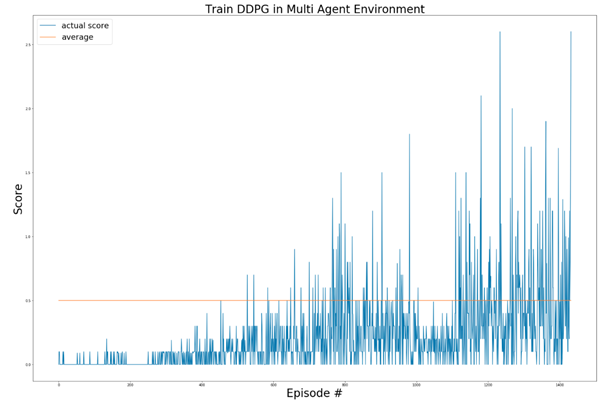

In [10]:
# Plotting the results ...
avg_score = 0.5
success = [avg_score] * len(scores)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores,np.arange(len(scores)), success)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.title('Train DDPG in Multi Agent Environment')
plt.gca().legend(('actual score','average'))
plt.savefig('results.png')
plt.show()

In [ ]:
env.close()